In [1]:
#import magic and libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#import data set
charity = pd.read_csv('Charity.csv')

In [3]:
#checkout my axes
charity.axes

[Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             45092, 45093, 45094, 45095, 45096, 45097, 45098, 45099, 45100,
             45101],
            dtype='int64', length=45102),
 Index([u'suburb', u'state', u'postcode', u'num_streets', u'RenewalsOrAcq',
        u'collection_amount', u'donation_amount', u'total_received', u'dob',
        u'age', u'weekends'],
       dtype='object')]

In [4]:
#show head
charity.head()

,suburb,state,postcode,num_streets,RenewalsOrAcq,collection_amount,donation_amount,total_received,dob,age,weekends
0,Darwin,NT,801,2,Renewals,315.00,0,315.00,10/10/1943,72,4
1,DARWIN,NT,801,6,Acq,303.55,0,303.55,1/01/1950,65,4
2,PARAP,NT,804,4,Renewals,250.00,0,250.00,8/02/1935,80,4
3,PARAP,NT,804,2,Renewals,28.60,50,78.60,3/10/1958,57,4
4,PARAP,NT,804,2,Renewals,78.00,0,78.00,na,NaN,4


In [5]:
#describe numeric data
charity.describe()
## note- need to get age working and create binary for renewals/acq
## change postcode to char

,postcode,num_streets,collection_amount,donation_amount,total_received,weekends
count,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000,45102.000000
mean,3965.124629,2.856747,76.817654,4.059311,80.876965,3.409782
std,1446.307894,2.615003,70.697075,21.337872,70.903512,0.847609
min,801.000000,0.000000,-550.000000,-150.000000,-550.000000,2.000000
25%,2611.000000,1.000000,36.000000,0.000000,40.000000,3.000000
50%,4020.000000,1.000000,60.000000,0.000000,63.000000,4.000000
75%,5043.000000,3.000000,100.000000,0.000000,100.000000,4.000000
max,9726.000000,42.000000,2123.000000,1000.000000,2123.000000,4.000000


In [6]:
#create dummies for acquisition, remove unnecessary columns
dummies = pd.get_dummies(charity.RenewalsOrAcq)
charity = pd.concat([charity, dummies], axis=1)
charity.drop(['Renewals'], inplace=True, axis=1)
charity.drop(['dob'], inplace=True, axis=1)
charity.drop(['RenewalsOrAcq'], inplace=True, axis=1)
charity.drop(['suburb'], inplace=True, axis=1)
charity.drop(['state'], inplace=True, axis=1)
charity.head()

,postcode,num_streets,collection_amount,donation_amount,total_received,age,weekends,Acq
0,801,2,315.00,0,315.00,72,4,0
1,801,6,303.55,0,303.55,65,4,1
2,804,4,250.00,0,250.00,80,4,0
3,804,2,28.60,50,78.60,57,4,0
4,804,2,78.00,0,78.00,NaN,4,0


In [17]:
#drop na values for age and convert to numeric
charity = charity.dropna(subset=['age'])
charity['age'] = charity['age'].convert_objects(convert_numeric=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [18]:
charity.head()

,postcode,num_streets,collection_amount,donation_amount,total_received,age,weekends,Acq
0,801,2,315.00,0,315.00,72,4,0
1,801,6,303.55,0,303.55,65,4,1
2,804,4,250.00,0,250.00,80,4,0
3,804,2,28.60,50,78.60,57,4,0
5,810,2,521.50,0,521.50,67,4,1


In [49]:
#have another look at the data
charity.describe()

,postcode,num_streets,collection_amount,donation_amount,total_received,age,weekends,Acq
count,26597.000000,26597.000000,26597.000000,26597.000000,26597.000000,26597.000000,26597.000000,26597.000000
mean,4058.585893,2.881716,77.967018,3.738053,81.705071,62.471858,3.352859,0.613979
std,1405.902134,2.548462,71.066831,18.735377,70.878127,14.066151,0.870711,0.486845
min,801.000000,0.000000,-414.950000,-150.000000,-500.000000,0.000000,2.000000,0.000000
25%,2785.000000,1.000000,37.000000,0.000000,40.000000,54.000000,2.000000,0.000000
50%,4078.000000,2.000000,61.000000,0.000000,64.000000,65.000000,4.000000,1.000000
75%,5049.000000,3.000000,100.000000,0.000000,101.300000,72.000000,4.000000,1.000000
max,8006.000000,40.000000,2123.000000,1000.000000,2123.000000,103.000000,4.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1138c8a50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a2b0b90>]], dtype=object)

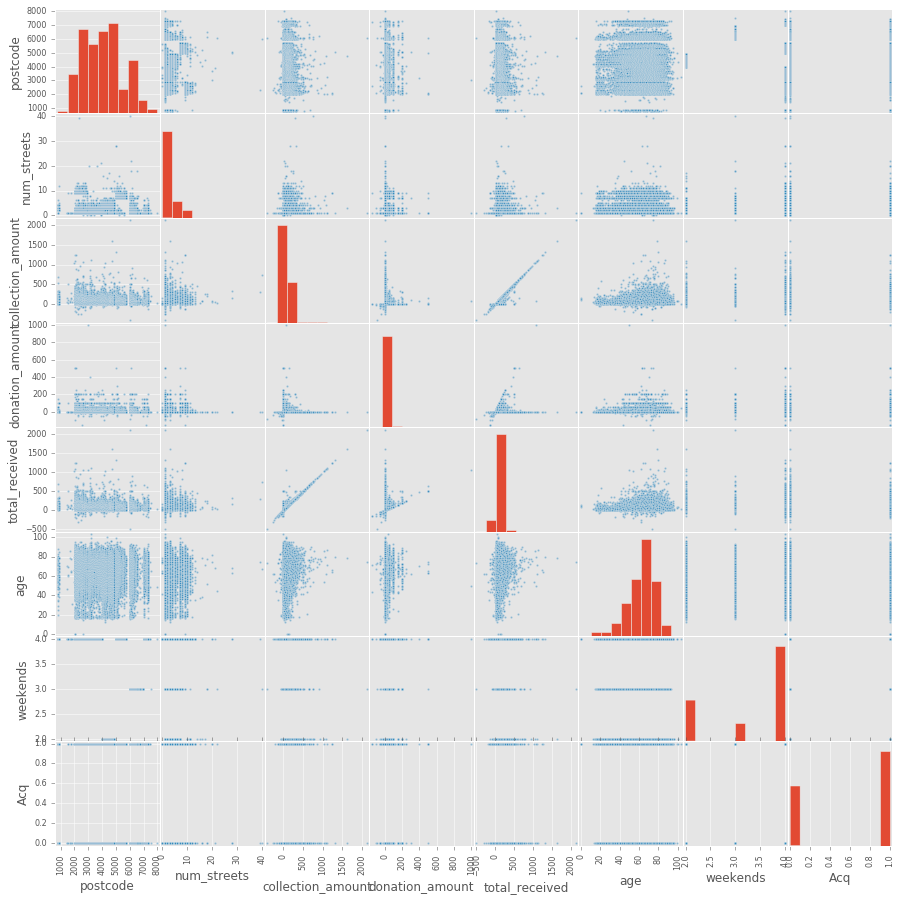

In [9]:
#create scatter matrix
pd.scatter_matrix(charity, figsize=(15,15))

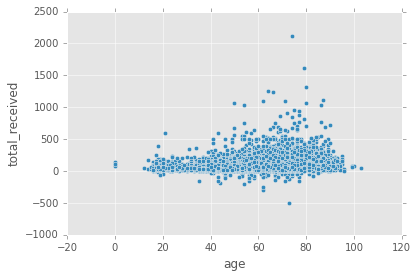

In [20]:
#close up scatter of number of age and total recieved
charity.plot(kind='scatter', x='age', y='total_received')

In [21]:
#check for NaNs - for some reason when running down this can get stuck..
np.any(np.isnan(charity.age))

False

In [22]:
#Fit a linear regression model using age as a predictor
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['age']
X = charity[feature_cols]
y = charity.total_received
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

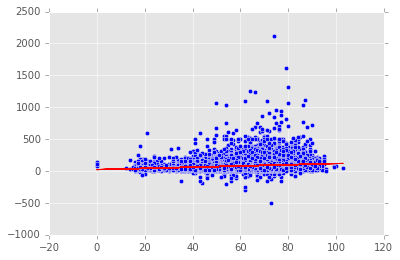

In [23]:
#plot a graph
rec_pred = linreg.predict(X)
plt.plot(charity.age, rec_pred, color='red')
plt.scatter(charity.age, charity.total_received)

In [47]:
#K means clustering
from sklearn.cluster import KMeans

np.random.seed(0)

est = KMeans(n_clusters=3, init='random')
est.fit(charity)
y_kmeans = est.predict(charity)



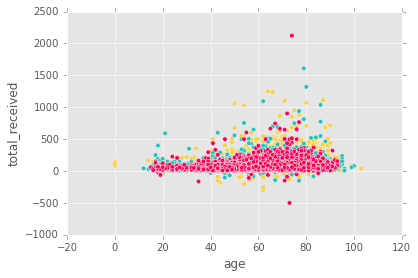

In [48]:
#plot the clusters
colors = np.array(['#FF0054','#FBD039','#23C2BC','#23C2BC'])
plt.figure()
charity.plot(kind='scatter', x='age', y='total_received',c=colors[y_kmeans])

In [ ]:
#Summary:
    #Yes! I clustered the data! - this took some time..
    
    #Really interesting distribution of age in the dataset and now that i've managed to 'wrangle' the data into shape
    #I think there is a lot more testing and predictive ability within the data.
    
    #Some colinearity between total amount received and donation/collection, so might need to strip that down
    
    #26,000 samples fairly robust my next challenge is to convert postcodes into more meaningful dummy variables
    #or lat/long
    